## <font color="Purple">**Project 3: TITLE -Heart Disease Prediction**</font>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [65]:
%matplotlib inline

In [66]:
df=pd.read_csv("Heart Disease data.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### <Font color="green">Domain Analysis</font>

- **patient_id**: Unique identifier for each patient.
- **slope_of_peak_exercise_st_segment**: Medical term used in cardiology, it is explain the behaviour of the ST segment on an electro gardiogram(ECG), when doing physical exercises the ST segment slowly progress towards Peak, upsloping numbered as 1 , Flat is 2 and downsloping numbered as 3.
- **thal**: Thalassemia condition describes the hemoglobin production and its function, categorised into Normal, fixed defect, reversible defect.
  fixed defect means, abnormality presents in the hemoglobin production, reversible defect means it can change under different physiological condition.
- **resting_blood_pressure**: Resting blood pressure in mm Hg.General normal blood pressure is the key indicator for the cardiovascular health. A reading of less than 120/80 mm Hg is considered normal.
- **chest_pain_type**: chest pain is an important clinical features to assess and diagnose heart conditions, categorized as(typical angina, atypical angina, non-anginal pain, asymptomatic), in the given data set valued as 1 to 4.
- **num_major_vessels**: Number of major vessels colored by fluoroscopy which is the imaging technic used to visualize the coronary arteries disease and assess the extent of it using X-ray technology, numbered as 0 to 3.
  - 0: No major vessels are significantly narrowed.
  - 1: One major vessel is significantly narrowed.
  - 2: Two major vessels are significantly narrowed.
  - 3: Three or more major vessels are significantly narrowed.
- **fasting_blood_sugar_gt_120_mg_per_dl**: the level of glucose for a person blood who have not eaten for atleast 8 hrs, the specific threshold in this context 120 mg/dl. the fasting blood sugar is >120 mg/dl is an elevated level numbered as 1 alternatively fasting blood sugar is < 120 is a normal or controlled level(1 = true; 0 = false).
- **resting_ekg_results**: Resting electrocardiogram ECG/EKG results are important in evaluating electrical activity of the heart and can help and diagnose various heart condition also normal EKG valued as 0 ,ST-T wave abnormality valued as 1 and  Left Ventricular Hypertrophy valued as 2.
- **serum_cholesterol_mg_per_dl**: The total amount of cholesterol in the blood, Guideline values are
  - Desirable Total Cholesterol: Less than 200 mg/dL.
  - Borderline High Cholesterol: 200-239 mg/dL.
  - High Cholesterol: 240 mg/dL and above.
- **oldpeak_eq_st_depression**: Refers to the ST depression induced by exercise relative to rest.measurement has done the difference between the basline level of the ST segment and at the level of maximal depression point during a stress test.Thresholds are
  - Mild: 0.5-1 mm depression
  - Moderate: 1-2 mm depression
  - Severe: >2 mm depression
- **sex**: Sex of the patient (1 = male; 0 = female).
- **age**: Age of the patient.
- **max_heart_rate_achieved**: provides the Maximum heart rate achieved during exercise stress test.
- **exercise_induced_angina**: The patients experienced chest pain during the exercise or not simply said Exercise-induced angina or not
  - No-exercise induced angina-0
  - Exercise induced angina-1

### <font color="green">Basic checks</font>

In [67]:
df.shape

(1025, 14)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [69]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [71]:
df.cp.unique()

array([0, 1, 2, 3], dtype=int64)

In [72]:
df.fbs.unique()

array([0, 1], dtype=int64)

In [73]:
df.sex.unique()

array([1, 0], dtype=int64)

In [74]:
df.thal.unique()

array([3, 2, 1, 0], dtype=int64)

In [75]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

### Insights:
- data set has 1025 rows and 14 columns
- NO object data type, 13 columns are input feature 1 column is a target
- most of the columns has binary classification either 0 or 1


### <font color="green">EDA</font>
### univariate analysis 

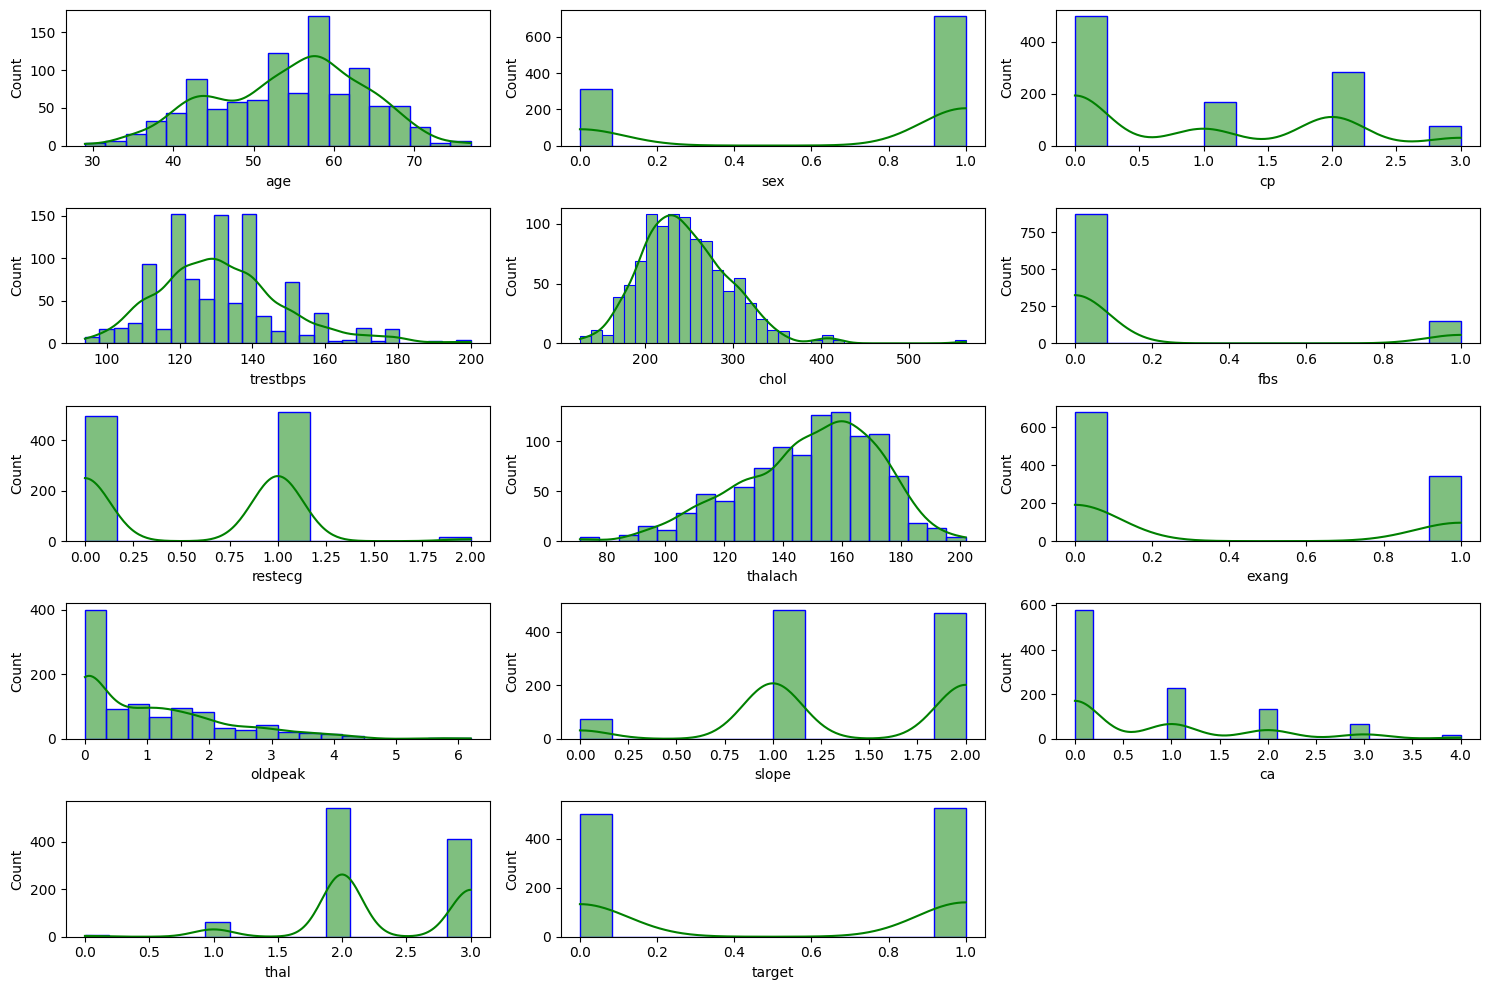

In [76]:
plt.figure(figsize=(15,10), facecolor="white")
plotnum=1
for column in df:
    if plotnum<=15:
        ax=plt.subplot(5,3,plotnum)
        sns.histplot(x=df[column], color="green", edgecolor="blue",kde=True)
        plotnum += 1 
    plt.tight_layout()
plt.show()

### Bivariate analysis 

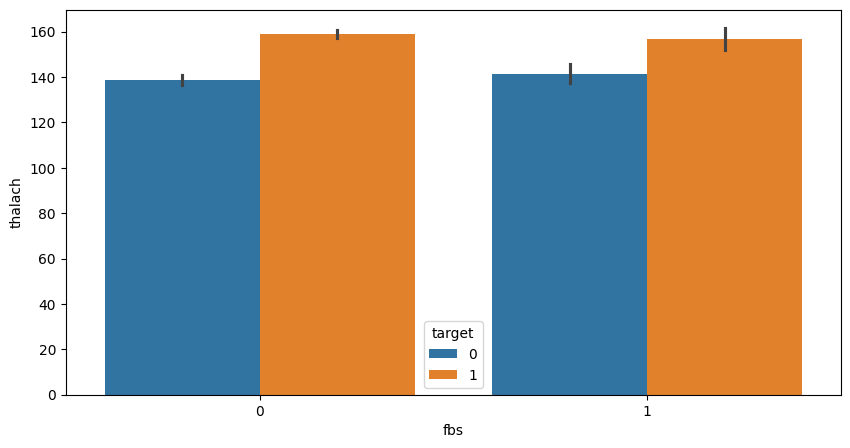

In [77]:
plt.figure(figsize=(10,5), facecolor="white")
sns.barplot(data=df, x='fbs', y='thalach', hue='target')
plt.show()

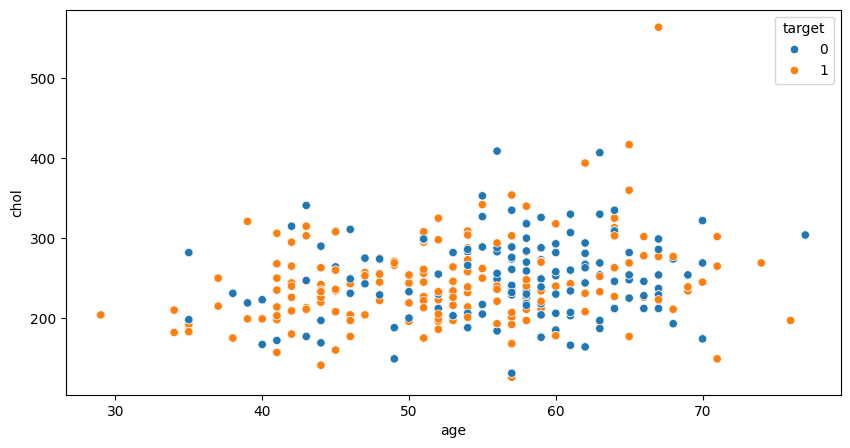

In [78]:
plt.figure(figsize=(10,5), facecolor="white")
sns.scatterplot(data=df, x='age', y='chol', hue='target')
plt.show()

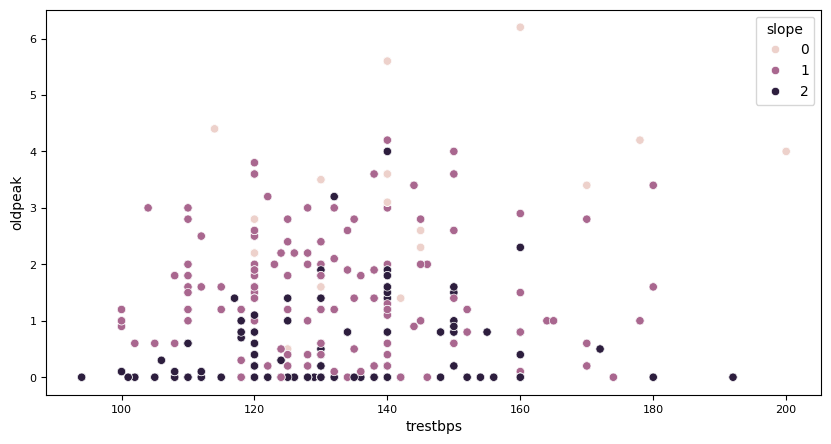

In [79]:
plt.figure(figsize=(10,5), facecolor="white")
sns.scatterplot(data=df, x='trestbps', y='oldpeak', hue='slope')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### <font color="green">Data Preprocessing</font>


In [80]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [81]:
df.duplicated().sum()

723

In [82]:
df=df.drop_duplicates()

In [83]:
df.duplicated().sum()

0

### <font color="green">boxplot</font>

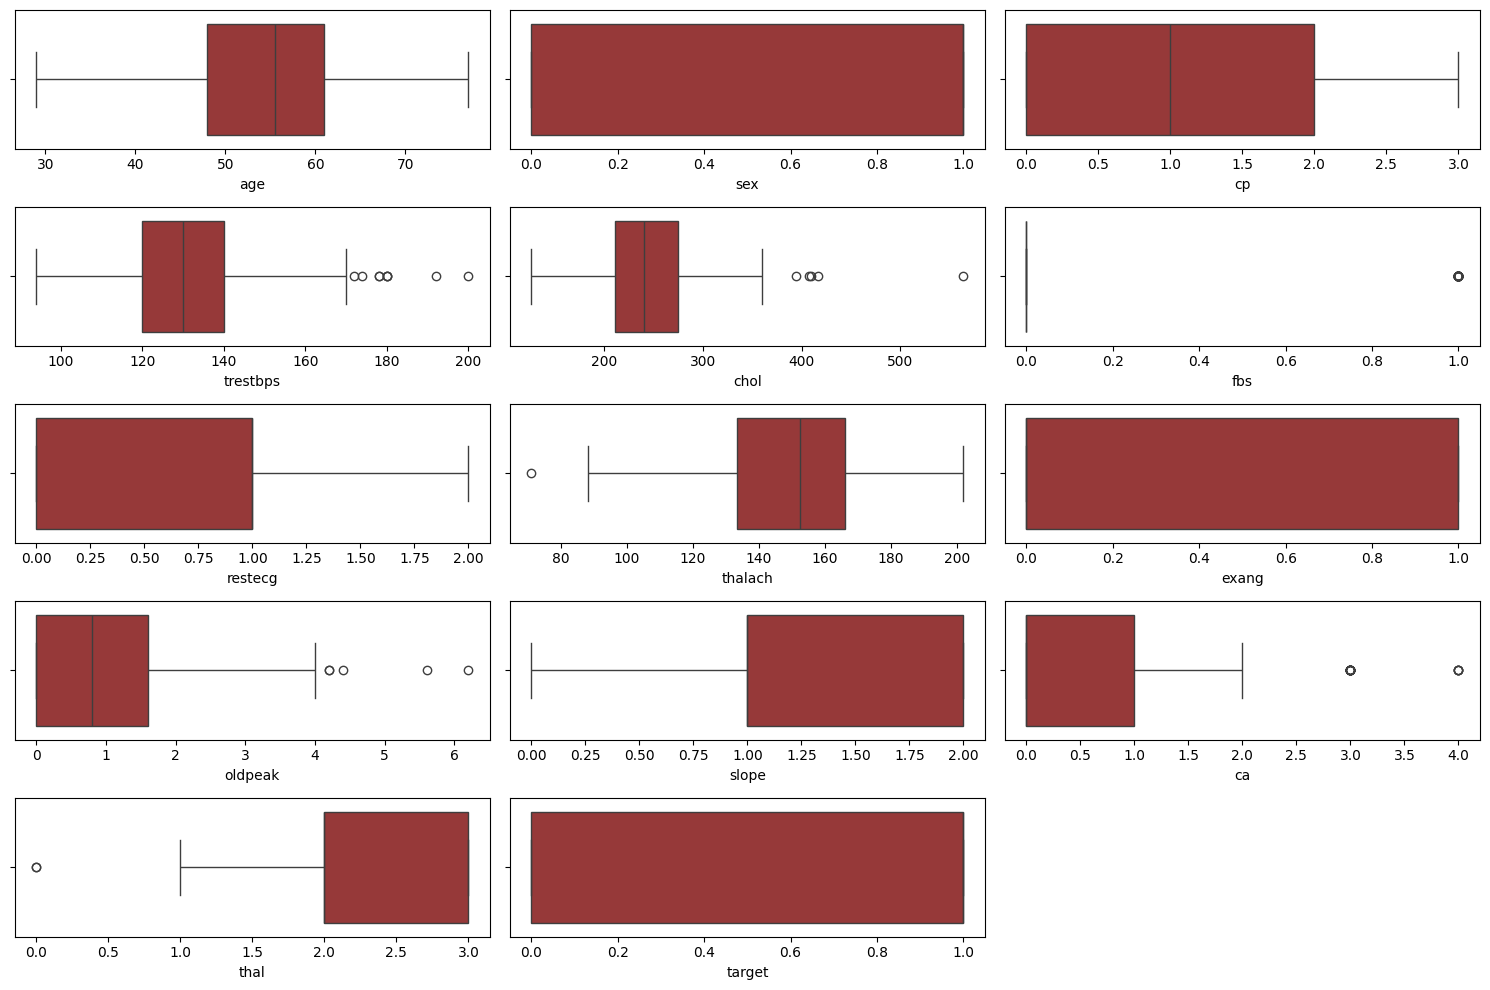

In [84]:
plt.figure(figsize=(15,10), facecolor="white")
plotnum=1
for column in df:
    if plotnum<=15:
        ax=plt.subplot(5,3,plotnum)
        sns.boxplot(x=df[column], color="brown")
        plotnum += 1 
    plt.tight_layout()
plt.show()

### Insights:
- trestBps and oldpeak two columns has the outliers 
- To impute trestBps is normal distribution, impute with mean, oldpeak is the skewed distribution, impute with median

In [85]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3-Q1

min_value = Q1-1.5*IQR

max_value = Q3+1.5*IQR

outliers_count = ((df>max_value) | (df<min_value)).sum()

outliers_percentage = (outliers_count/len(df))*100
outliers_percentage

age          0.000000
sex          0.000000
cp           0.000000
trestbps     2.980132
chol         1.655629
fbs         14.900662
restecg      0.000000
thalach      0.331126
exang        0.000000
oldpeak      1.655629
slope        0.000000
ca           7.947020
thal         0.662252
target       0.000000
dtype: float64

### Handling outliers

In [86]:
Q1 = df["trestbps"].quantile(0.25)
Q3 = df["trestbps"].quantile(0.75)

IQR = Q3-Q1

min_limit = Q1-1.5*IQR
max_limit = Q3+1.5*IQR

df.loc[(df["trestbps"]<min_limit) | (df["trestbps"]>max_limit),"trestbps"] =df["trestbps"].mean()

In [87]:
df.loc[(df["trestbps"]<min_limit) | (df["trestbps"]>max_limit),"trestbps"]

Series([], Name: trestbps, dtype: float64)

In [88]:
Q1 = df["oldpeak"].quantile(0.25)
Q3 = df["oldpeak"].quantile(0.75)

IQR = Q3-Q1

min_limit = Q1-1.5*IQR
max_limit = Q3+1.5*IQR

df.loc[(df["oldpeak"]<min_limit) | (df["oldpeak"]>max_limit),"oldpeak"] =df["oldpeak"].median()

In [89]:
df.loc[(df["oldpeak"]<min_limit) | (df["oldpeak"]>max_limit),"oldpeak"]

Series([], Name: oldpeak, dtype: float64)

### <font color="green">Feature selection</font>


<Axes: >

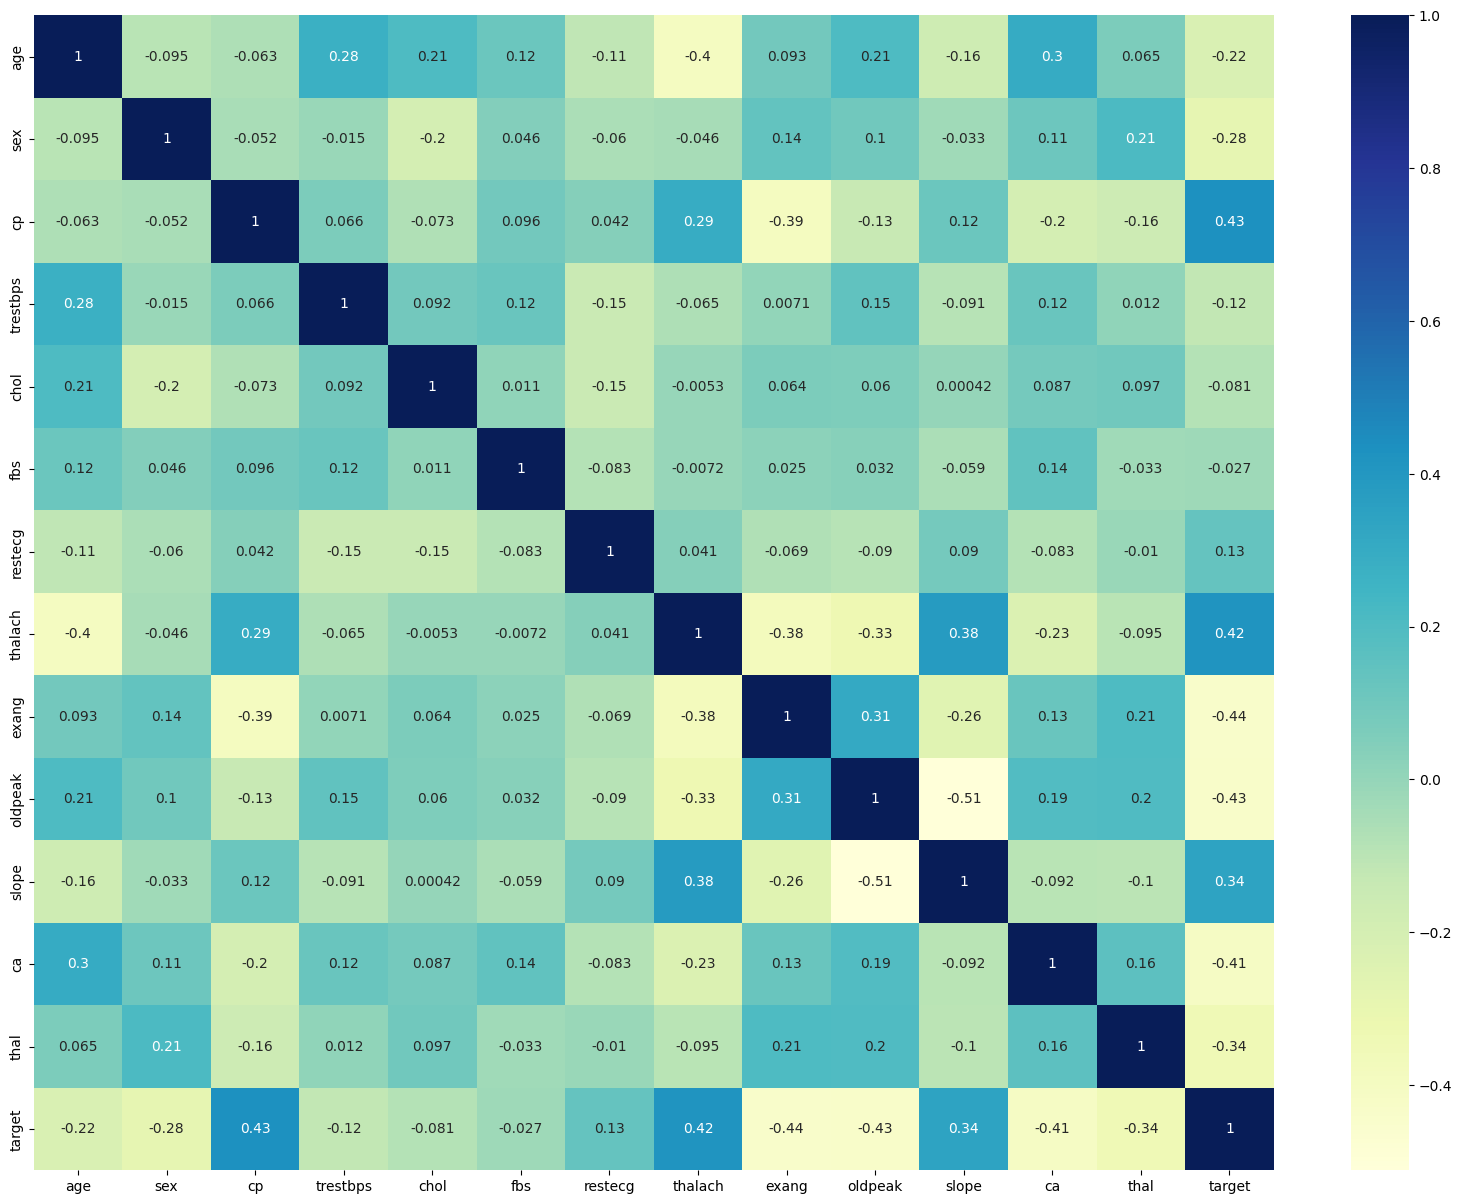

In [90]:
plt.figure(figsize=(20,15))
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True , cmap='YlGnBu')

### Insights:
- There is no correlation between the features , heighest correlation is 45

### <font color="green">Model creation </font>

In [102]:
X=df.drop('target',axis=1)
y=df.target

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

In [104]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 13)
(61, 13)
(241,)
(61,)


### <font color>Balancing</font>

In [105]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [106]:
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [107]:
print(Counter(y_train))
print(Counter(y_train_res))

Counter({1: 137, 0: 104})
Counter({1: 137, 0: 137})


### Model Implementation 

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the classifier
model_gbc = GradientBoostingClassifier()

# Train the model on the resampled training data
model_gbc.fit(x_train_res, y_train_res)

# Make predictions on the test set
y_pred_gbc = model.predict(x_test)

# Evaluate the model
test_accuracy_gbc = accuracy_score(y_test, y_pred)
print("Test Accuracy GBC:", test_accuracy_gbc)
print("Classification Report GBC:\n", classification_report(y_test, y_pred))

Test Accuracy GBC: 0.8360655737704918
Classification Report GBC:
               precision    recall  f1-score   support

           0       0.93      0.76      0.84        34
           1       0.76      0.93      0.83        27

    accuracy                           0.84        61
   macro avg       0.84      0.85      0.84        61
weighted avg       0.85      0.84      0.84        61



In [109]:
from sklearn.neural_network import MLPClassifier
model_mlp=MLPClassifier()
model_mlp.fit(x_train_res,y_train_res)
y_pred_mlp=model.predict(x_test)
#Evaluation 
test_accuracy_mlp = accuracy_score(y_test, y_pred)
print("Test Accuracy MLP:", test_accuracy_mlp)
print("Classification Report MLP:\n", classification_report(y_test, y_pred))

Test Accuracy MLP: 0.8360655737704918
Classification Report MLP:
               precision    recall  f1-score   support

           0       0.93      0.76      0.84        34
           1       0.76      0.93      0.83        27

    accuracy                           0.84        61
   macro avg       0.84      0.85      0.84        61
weighted avg       0.85      0.84      0.84        61



## Model Comparison

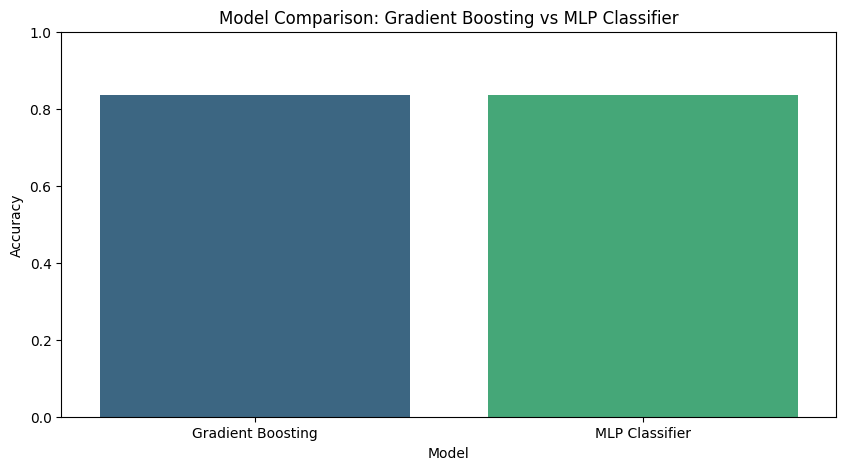

In [110]:
# Prepare data for plotting
results = pd.DataFrame({
    'Model': ['Gradient Boosting', 'MLP Classifier'],
    'Accuracy': [test_accuracy_gbc, test_accuracy_mlp]
})

# Plot the comparison
plt.figure(figsize=(10, 5))
sns.barplot(data=results, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Comparison: Gradient Boosting vs MLP Classifier')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

### Insights:
- Both Models are giving more or less same accuracy for this data set around 83%

## Tableau Task 

### <font color="green">Histogram Age</font>


<img src="histogramage.png" alt="Histogram chart" width="500"/>

### <font color="green">Scatter Plot</font>

<img src="scatter.png" alt="Scatter plot" width="500"/>